## Import Libraries

# Feature selection-->do it with matual Feature selection

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,cross_val_predict
from mlxtend.plotting import plot_learning_curves


## Read File

In [403]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [404]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [405]:
df['season']=df.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"})
df['weathersit']=df.weathersit.replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})
df['yr']=df.yr.replace([0,1],[2011,2012])
df['weekday']=df.weekday.replace([0,1,2,3,4,5,6],["sun","mon","tue","wed","thu","fri","sat"])

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.5+ KB


# Clean Dataset

## Find Outliers

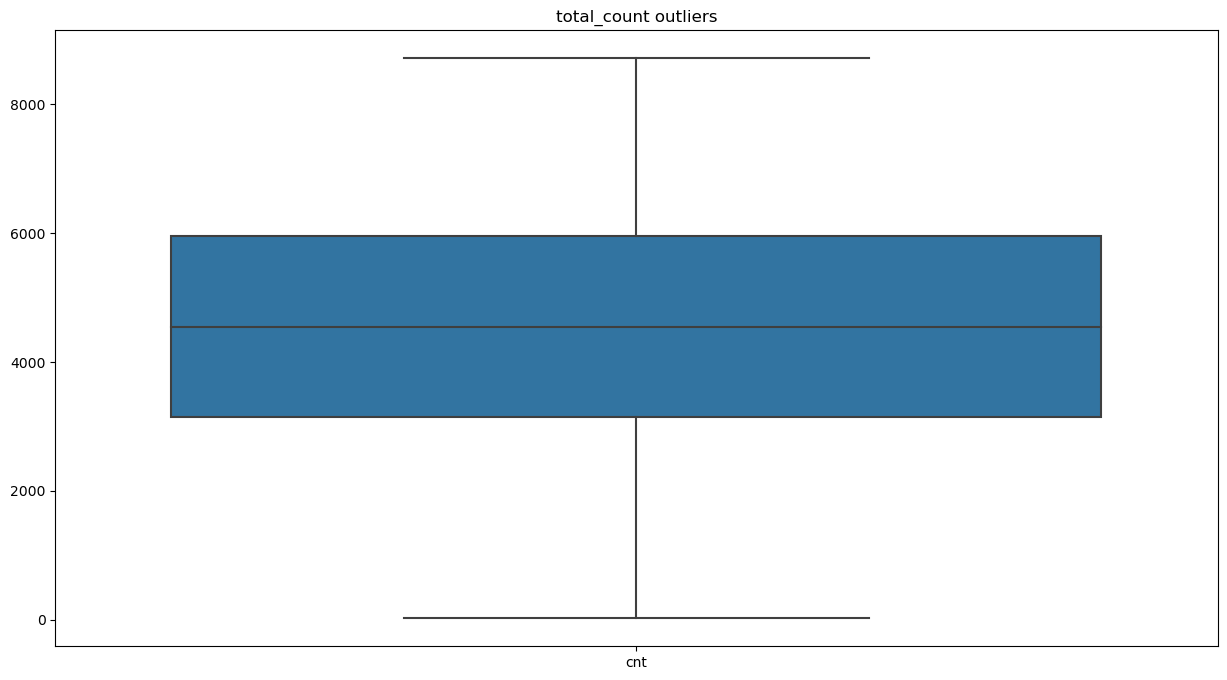

In [407]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['cnt']])
ax.set_title('total_count outliers')
plt.show()

### There is no outliers data in cnt feature

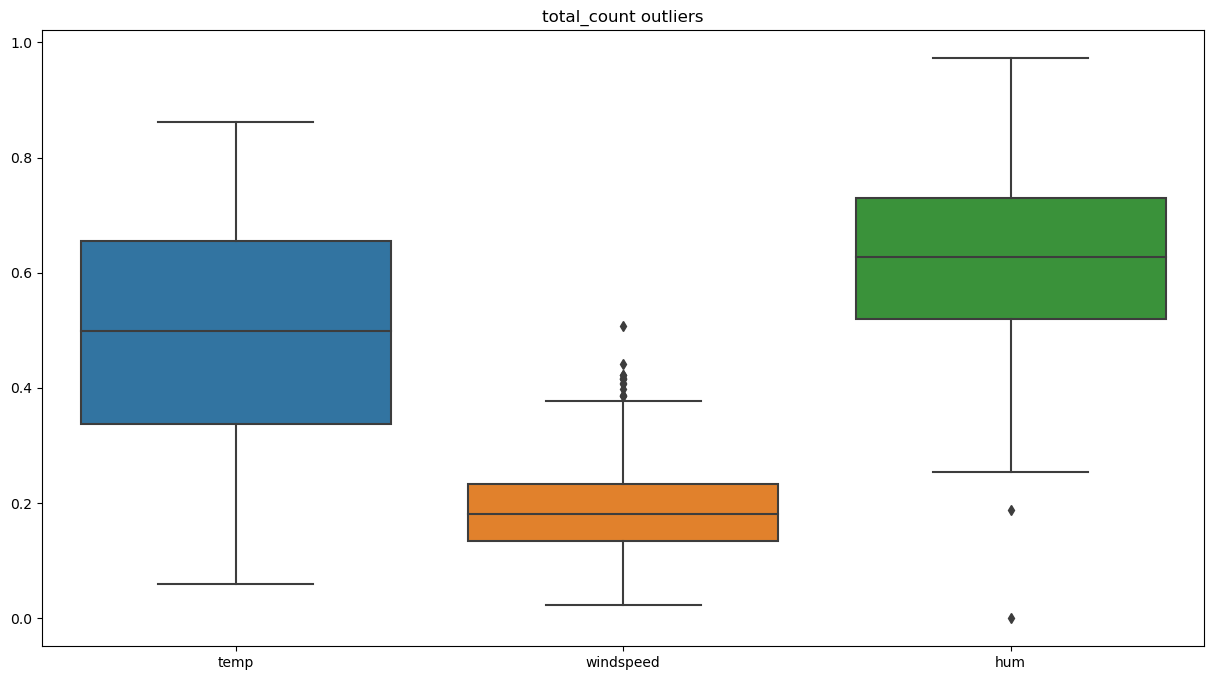

In [408]:
fig,ax=plt.subplots(figsize=(15,8))

sns.boxplot(data=df[['temp','windspeed','hum']])
ax.set_title('total_count outliers')
plt.show()

### There are some outliers in windspeed and hum feature

In [409]:
import warnings
warnings.filterwarnings("ignore")

In [410]:
cols = ['windspeed','hum']
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()
df.describe()

,index,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,365.779637,366.779637,2011.499303,6.562064,0.029289,0.684798,0.497365,0.476252,0.631562,0.186287,856.944212,3675.899582,4532.843794
std,210.971354,210.971354,0.500349,3.439113,0.168732,0.464921,0.183617,0.163155,0.139222,0.071786,689.273998,1557.676255,1933.542429
min,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,184.000000,185.000000,2011.000000,4.000000,0.000000,0.000000,0.337500,0.337939,0.524583,0.134329,318.000000,2545.000000,3214.000000
50%,364.000000,365.000000,2011.000000,7.000000,0.000000,1.000000,0.505833,0.491783,0.630833,0.178496,727.000000,3681.000000,4570.000000
75%,549.000000,550.000000,2012.000000,10.000000,0.000000,1.000000,0.656667,0.611121,0.732917,0.230721,1120.000000,4807.000000,6031.000000
max,730.000000,731.000000,2012.000000,12.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000


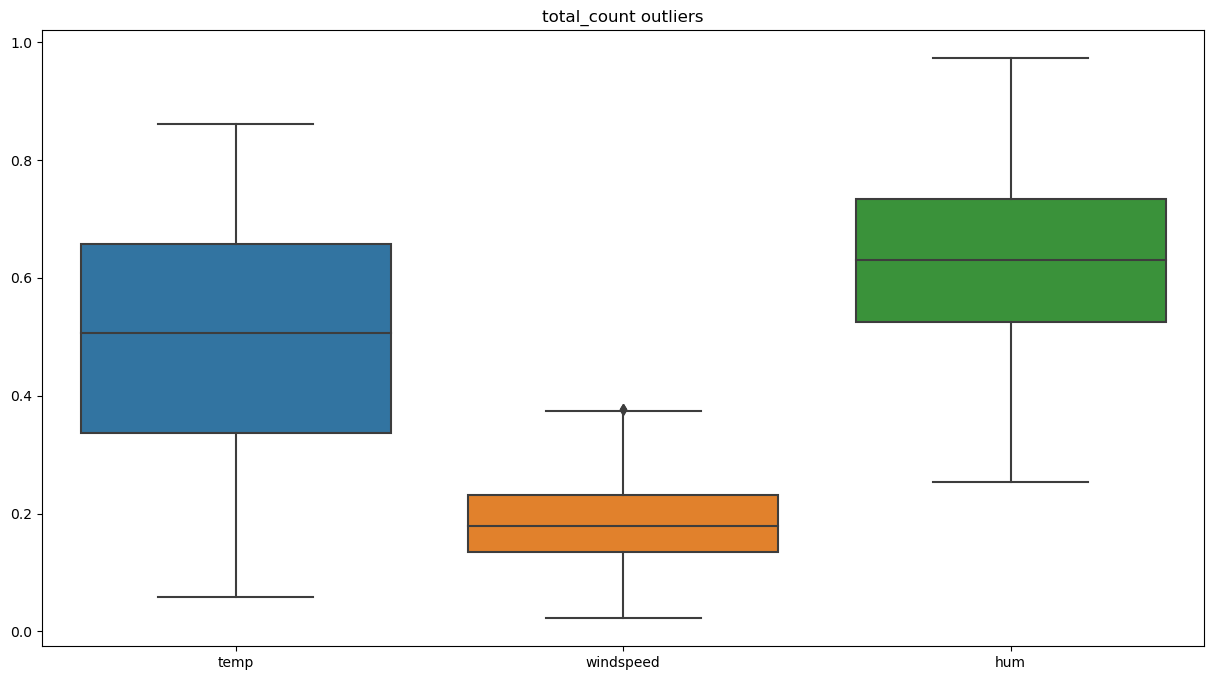

In [411]:
fig,ax=plt.subplots(figsize=(15,8))

sns.boxplot(data=df[['temp','windspeed','hum']])
ax.set_title('total_count outliers')
plt.show()

## Change numerical columns to categorical

In [412]:
df['season']=df.season.astype('object')
df['yr']=df.yr.astype('object')
df['mnth']=df.mnth.astype('object')
df['holiday']=df.holiday.astype('object')
df['weekday']=df.weekday.astype('object')
df['workingday']=df.workingday.astype('object')
df['weathersit']=df.weathersit.astype('object')

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       717 non-null    int64  
 1   instant     717 non-null    int64  
 2   dteday      717 non-null    object 
 3   season      717 non-null    object 
 4   yr          717 non-null    object 
 5   mnth        717 non-null    object 
 6   holiday     717 non-null    object 
 7   weekday     717 non-null    object 
 8   workingday  717 non-null    object 
 9   weathersit  717 non-null    object 
 10  temp        717 non-null    float64
 11  atemp       717 non-null    float64
 12  hum         717 non-null    float64
 13  windspeed   717 non-null    float64
 14  casual      717 non-null    int64  
 15  registered  717 non-null    int64  
 16  cnt         717 non-null    int64  
dtypes: float64(4), int64(5), object(8)
memory usage: 95.4+ KB


# Change categorical columns

In [414]:
df=df.drop(['index','instant','dteday'],axis=1)

In [415]:
s =df.dtypes == 'object'
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
No. of. categorical features:  7


In [416]:
df = pd.get_dummies(df, columns = object_cols,drop_first=True)
df

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,0.254167,0.226642,0.652917,0.350133,247,1867,2114,1,0,0,...,0,0,0,0,1,0,0,1,0,1
713,0.253333,0.255046,0.590000,0.155471,644,2451,3095,1,0,0,...,0,0,0,0,0,0,0,1,0,1
714,0.253333,0.242400,0.752917,0.124383,159,1182,1341,1,0,0,...,0,0,1,0,0,0,0,0,0,1
715,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1,0,0,...,0,0,0,1,0,0,0,0,0,0


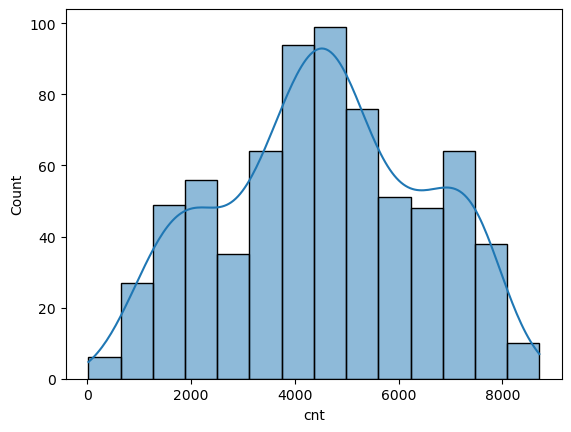

In [417]:
sns.histplot(df["cnt"], kde=True)
plt.show()

# Model prepration

In [418]:
from sklearn.preprocessing import MinMaxScaler

In [419]:
scaler = MinMaxScaler()

In [420]:
X = df.drop(['cnt'],axis=1)
y = df['cnt']


# Feature selection

<AxesSubplot:>

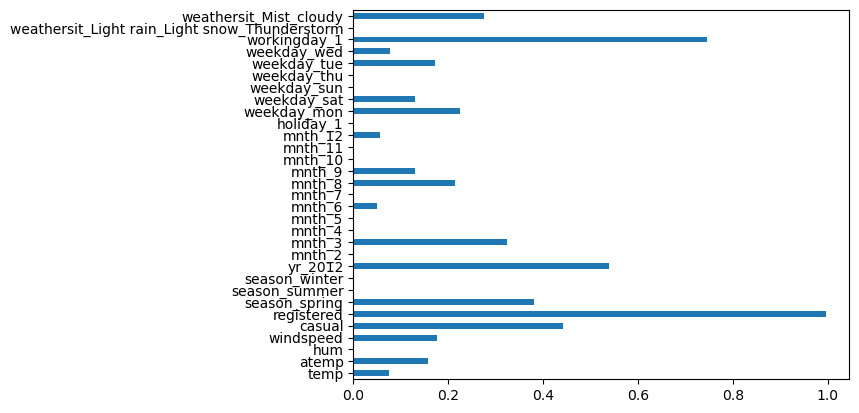

In [423]:
importance = mutual_info_classif(X,y)
importance_series = pd.Series(importance, index=X.columns)
importance_series.plot(kind = 'barh')


In [424]:
d=df.loc[: , importance_series[importance_series > 0.1].index]
d.head()

,atemp,windspeed,casual,registered,season_spring,yr_2012,mnth_3,mnth_8,mnth_9,weekday_mon,weekday_sat,weekday_tue,workingday_1,weathersit_Mist_cloudy
0,0.363625,0.160446,331,654,1,0,0,0,0,0,1,0,0,1
1,0.353739,0.248539,131,670,1,0,0,0,0,0,0,0,0,1
2,0.189405,0.248309,120,1229,1,0,0,0,0,1,0,0,1,0
3,0.212122,0.160296,108,1454,1,0,0,0,0,0,0,1,1,0
4,0.229270,0.186900,82,1518,1,0,0,0,0,0,0,0,1,0


# Select features

In [425]:
num_vars = ['atemp','windspeed','casual','registered','cnt']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [426]:
X1=df.filter(['atemp','windspeed','casual','registered','season_spring','yr_2012','mnth_3','mnth_8','month_9','weekday_sat','weekday_mon','weekday_tue','workingday_1','weathersit_Mist_cloudy'],axis=1).values

Y1=df['cnt'].values


In [427]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 42)

In [428]:
def Model(model):
    
    print(f"Model MSE :  {metrics.mean_squared_error(y_test1,y_predict)}")
    print(f"R2_SCORE : { metrics.r2_score(y_test1, y_predict)}")



In [395]:
from sklearn import linear_model

In [396]:
from sklearn.tree import DecisionTreeRegressor

In [397]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier

In [398]:
from sklearn.ensemble import GradientBoostingRegressor

In [399]:
from sklearn.svm import SVR

In [400]:
from sklearn.feature_selection import mutual_info_classif

# 1.Linear Regression

In [429]:
linear1 = LinearRegression()
linear1.fit(X_train1, y_train1)
y_predict= linear1.predict(X_test1)

In [430]:
Model(linear1)

Model MSE :  1.4814868569923108e-31
R2_SCORE : 1.0


In [431]:
mse10=metrics.mean_squared_error(y_test1, y_predict)
training10 =linear1.score(X_train1, y_train1)
testing10 = linear1.score(X_test1, y_test1)
print(f'traning score: {training10}\ntesting score: {testing10}')

traning score: 1.0
testing score: 1.0


# 2.Decision Tree Regression

In [432]:
dtr1=DecisionTreeRegressor(min_samples_split=1,max_leaf_nodes=5)
dtr1.fit(X_train1,y_train1)

DecisionTreeRegressor(max_leaf_nodes=5, min_samples_split=1)

In [433]:
y_predict= dtr1.predict(X_test1)

In [434]:
Model(dtr1)

Model MSE :  0.006551539148697768
R2_SCORE : 0.8674869567358786


In [435]:
mse11=metrics.mean_squared_error(y_test1, y_predict)
training11 =dtr1.score(X_train1, y_train1)
testing11 = dtr1.score(X_test1, y_test1)
print(f'traning score: {training11}\ntesting score: {testing11}')

traning score: 0.8714857080167583
testing score: 0.8674869567358786


# 3.Polynomial Regression

In [436]:
poly1 = make_pipeline( PolynomialFeatures(degree=4, include_bias=False), 
              Ridge(alpha=1))
poly1.fit(X_train1, y_train1)
y_predict= poly1.predict(X_test1)

In [437]:
Model(poly1)

Model MSE :  0.00015443844023311037
R2_SCORE : 0.9968762900979808


In [438]:
mse12=metrics.mean_squared_error(y_test1, y_predict)
training12 =poly1.score(X_train1, y_train1)
testing12 = poly1.score(X_test1, y_test1)
print(f'traning score: {training12}\ntesting score: {testing12}')

traning score: 0.9976574304214942
testing score: 0.9968762900979808


# 4.RandomForestRegression

In [450]:
random1= RandomForestRegressor(min_samples_split=3)
random1.fit(X_train1, y_train1)
y_predict= random1.predict(X_test1)

In [451]:
Model(random1)

Model MSE :  0.00021401576591060947
R2_SCORE : 0.9956712644458587


In [452]:
mse13=metrics.mean_squared_error(y_test1, y_predict)
training13 =random1.score(X_train1, y_train1)
testing13 = random1.score(X_test1, y_test1)
print(f'traning score: {training13}\ntesting score: {testing13}')

traning score: 0.9994241919324566
testing score: 0.9956712644458587


# 5.GradientBoosting

In [453]:
gradient1= GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1)
gradient1.fit(X_train1, y_train1)
y_predict= gradient1.predict(X_test1)

In [454]:
Model(gradient1)

Model MSE :  0.00021083051684216448
R2_SCORE : 0.9957356900774598


In [444]:
mse14=metrics.mean_squared_error(y_test1, y_predict)
training14 =gradient1.score(X_train1, y_train1)
testing14 = gradient1.score(X_test1, y_test1)
print(f'traning score: {training14}\ntesting score: {testing14}')

traning score: 0.9965237844444053
testing score: 0.995235071307433


# 6.SVM Regression

In [455]:
svr1= SVR(kernel='linear')
svr1.fit(X_train1, y_train1)
y_predict= svr1.predict(X_test1)

In [456]:
Model(svr1)

Model MSE :  0.0015666348789743322
R2_SCORE : 0.9683128573630104


In [457]:
mse15=metrics.mean_squared_error(y_test1, y_predict)
training15 =svr1.score(X_train1, y_train1)
testing15 = svr1.score(X_test1, y_test1)
print(f'traning score: {training15}\ntesting score: {testing15}')

traning score: 0.9699722538914834
testing score: 0.9683128573630104


# Final result With Feature selection

In [458]:
data1={'Model':['Linear','DicisionTree','poly','RandomForest','GradientBoosting','Svm'],'Test_Accuracy':[testing10,testing11,testing12,testing13,testing14,testing15],
     'Train_Accuracy':[training10,training11,training12,training13,training14,training15],'MSE':[mse10,mse11,mse12,mse13,mse14,mse15]}
result1=pd.DataFrame(data1)
result1

,Model,Test_Accuracy,Train_Accuracy,MSE
0,Linear,1.000000,1.000000,1.481487e-31
1,DicisionTree,0.867487,0.871486,6.551539e-03
2,poly,0.996876,0.997657,1.544384e-04
3,RandomForest,0.995671,0.999424,2.140158e-04
4,GradientBoosting,0.995235,0.996524,2.355815e-04
5,Svm,0.968313,0.969972,1.566635e-03
